# General Report

## Setup

In [1]:
from matplotlib.colors import ListedColormap 
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from lib import formatting as sd_formatting
import pyodbc 
import toml
import config_logging
import logging
import urllib.request
import pandas as pd
import colorcet as cc
import numpy as np

log = logging.getLogger(__name__)
external_ip = urllib.request.urlopen('https://ident.me').read().decode('utf8')

properties = toml.load("./.streamlit/secrets.toml")

database_props = properties[properties["database"]["flavour"]] 


2022-09-01 15:05:17,860 [INFO] numexpr.utils: NumExpr defaulting to 4 threads.


## Reload

In [2]:
### Set up

%load_ext autoreload
%autoreload 3

from data.daos import dao_facade_local as dao_fac
from lib import db_tools as db_tools
from lib import masters_data_analytics_lib as mlib
from lib import stats as stats

db_conn = None
db_conn = db_tools.get_db_conn(database_props)


2022-09-01 15:05:20,078 [DEBUG] matplotlib.pyplot: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-09-01 15:05:20,083 [DEBUG] matplotlib.pyplot: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-09-01 15:05:20,681 [INFO] lib.db_tools: DATABASE CONNECTIVITY


## Search Criteria

In [3]:
city      = "London"
post_code = ""

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

borough   = "Islington"
ward_name = "Holloway"

## 27% Black African Carribean at Borough Level
borough   = "Lewisham"
ward_name = "Bellingham"

# borough   = "Barking and Dagenham"
# ward_name = "Abbey"

## FEMALE
### HIGH RATION
# borough   = "Croydon"
# ward_name = "New Addington North"

# borough   = "Merton"
# ward_name = "Dundonald"


year_from = 2013
year_to   = 2022

#post_code = "SW20 8ED"

search_term = {
    "city"      : city
  , "borough"   : borough
  , "ward_name" : ward_name
  , "post_code" : post_code
  , "year_from" : year_from
  , "year_to"   : year_to
}


# REPORT GENERATION

2022-09-01 15:05:21,893 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:21,894 [DEBUG] root: retrieving post_code
2022-09-01 15:05:22,972 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:22,973 [DEBUG] managers.sections.sd_report_section_02_Population: <<<<<<<<<<<<<<<<<<
2022-09-01 15:05:22,974 [DEBUG] managers.sections.sd_report_section_02_Population: {'city': 'London', 'borough': 'Lewisham', 'ward_name': 'Bellingham', 'post_code': '', 'year_from': 2013, 'year_to': 2022, 'oacode': ''}
2022-09-01 15:05:22,975 [DEBUG] managers.sections.sd_report_section_02_Population: <<<<<<<<<<<<<<<<<<
2022-09-01 15:05:22,976 [DEBUG] root: Retrieving population min max year
2022-09-01 15:05:23,019 [DEBUG] managers.sections.sd_report_section_02_Population: population orig_year_to    :2022
2022-09-01 15:05:23,021 [DEBUG] managers.sections.sd_report_section_02_Population: population search_year_to  :2011
2022-09-01 15:05:23,023 [DEBUG] managers.sections.sd_report_section_02_Populati

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:26,165 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_ward_density_pph:7.766666666666667
2022-09-01 15:05:26,165 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_ward_density_pph:293.08796992481206
2022-09-01 15:05:26,167 [DEBUG] managers.sections.sd_report_section_02_Population: [7.766666666666667, 65.83092731829575, 123.89518796992483, 181.95944862155395, 240.02370927318302, inf]
2022-09-01 15:05:26,200 [DEBUG] managers.sections.sd_report_section_02_Population: min_borough_density_pph:44.87246023949719
2022-09-01 15:05:26,201 [DEBUG] managers.sections.sd_report_section_02_Population: max_borough_density_pph:215.0413051899063
2022-09-01 15:05:26,269 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:26,270 [DEBUG] root: Retrieving ethnicity min max year
2022-09-01 15:05:26,301 [DEBUG] root: ethnicity_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:28,186 [DEBUG] root: ethnicity_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:29,204 [DEBUG] root: ethnicity_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:29,459 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:29,460 [DEBUG] root: Retrieving general health min max year
2022-09-01 15:05:29,491 [DEBUG] managers.sections.sd_report_section_04_General_Health: health orig_year_to    :2022
2022-09-01 15:05:29,493 [DEBUG] managers.sections.sd_report_section_04_General_Health: health search_year_to  :2021
2022-09-01 15:05:29,494 [DEBUG] root: general_health_ratio_average_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:30,607 [DEBUG] root: genearl_health_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:31,422 [DEBUG] root: general_health_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:31,654 [DEBUG] managers.sections.sd_report_section_04_General_Health: Ward more so Green
2022-09-01 15:05:31,655 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-09-01 15:05:31,657 [DEBUG] managers.sections.sd_report_section_04_General_Health: Ward more so Green
2022-09-01 15:05:31,658 [DEBUG] managers.sections.sd_report_section_04_General_Health: Borough more so Green
2022-09-01 15:05:31,696 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:31,697 [DEBUG] root: Retrieving qualifications min max year
2022-09-01 15:05:31,776 [DEBUG] managers.sections.sd_report_section_05_Education:    MAX_YEAR  MIN_YEAR
0      2011      2011
2022-09-01 15:05:31,781 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_min:2011
2022-09-01 15:05:31,781 [DEBUG] managers.sections.sd_report_section_05_Education: education_year_max:2011
2022-09-01 15:05:31,782 [DEBUG] managers.sections.sd_report_section_05_Education: educat

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:33,747 [DEBUG] root: education_ratio_by_borough_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:34,813 [DEBUG] root: education_ratio_by_borough_ward_years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


2022-09-01 15:05:35,045 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:35,046 [DEBUG] root: Retrieving earnings min max year
2022-09-01 15:05:35,066 [DEBUG] managers.sections.sd_report_section_06_Earnings:    MAX_YEAR  MIN_YEAR
0      2021      2010
2022-09-01 15:05:35,067 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings orig_year_to    :2022
2022-09-01 15:05:35,068 [DEBUG] managers.sections.sd_report_section_06_Earnings: earnings search_year_to  :2021
2022-09-01 15:05:35,069 [DEBUG] root: retrieving uk earnings year
2022-09-01 15:05:35,090 [DEBUG] root: Retrieving Crime Ranked By Borough Years


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:05:39,456 [DEBUG] managers.sections.sd_report_section_06_Earnings: [[24405.0, 25000.0, 26323.0, 28430.0, 29044.0, 27105.0, 30372.0, 31114.0, 29162.0]]
2022-09-01 15:05:39,457 [DEBUG] managers.sections.sd_report_section_06_Earnings: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
2022-09-01 15:05:39,462 [DEBUG] managers.sections.sd_report_section_06_Earnings: slope:735.7166666666667
2022-09-01 15:05:40,546 [INFO] lib.db_tools: DATABASE CONNECTIVITY
2022-09-01 15:05:40,547 [DEBUG] root: Retrieving crime min max year
2022-09-01 15:05:40,565 [DEBUG] managers.sections.sd_report_section_07_Crime: 2001
2022-09-01 15:05:40,565 [DEBUG] managers.sections.sd_report_section_07_Crime: 2022
2022-09-01 15:05:40,566 [DEBUG] managers.sections.sd_report_section_07_Crime: crime orig_year_to    :2022
2022-09-01 15:05:40,567 [DEBUG] managers.sections.sd_report_section_07_Crime: crime search_year_to  :2022
2022-09-01 15:05:40,567 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY

C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:06:17,239 [DEBUG] managers.sections.sd_report_section_07_Crime: QRY Ended
2022-09-01 15:06:17,240 [DEBUG] root: city_population
2022-09-01 15:06:17,259 [DEBUG] root: city_population


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:06:17,636 [DEBUG] managers.sections.sd_report_section_07_Crime: [[0.0796, 0.07498, 0.082, 0.08291, 0.08245, 0.08436, 0.09304, 0.08735, 0.08321, 0.03484]]
2022-09-01 15:06:17,636 [DEBUG] managers.sections.sd_report_section_07_Crime: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
2022-09-01 15:06:17,638 [DEBUG] managers.sections.sd_report_section_07_Crime: slope:-0.0017344242424242426
2022-09-01 15:06:18,532 [DEBUG] root: Retrieving Crim Major categories top 5 for borough in year


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:06:36,857 [DEBUG] root: Retrieving Crim Major categories for a ward top 5 for borough in year


C:\DISTRIBUTIONS\Python\Python3_10_2\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


2022-09-01 15:06:38,061 [DEBUG] selenium.webdriver.remote.remote_connection: POST http://localhost:61050/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}, "desiredCapabilities": {"browserName": "chrome", "pageLoadStrategy": "normal", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--headless", "-no-sandbox", "--disable-dev-shm-usage"]}}}
2022-09-01 15:06:38,063 [DEBUG] urllib3.connectionpool: Starting new HTTP connection (1): localhost:61050
2022-09-01 15:06:39,049 [DEBUG] urllib3.connectionpool: http://localhost:61050 "POST /session HTTP/1.1" 500 1090
2022-09-01 15:06:39,050 [DEBUG] selenium.webdriver.remote.remote_connection: Finished Request


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 103
Current browser version is 105.0.5195.52 with binary path C:\Program Files (x86)\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	Ordinal0 [0x00C36463+2188387]
	Ordinal0 [0x00BCE461+1762401]
	Ordinal0 [0x00AE3D78+802168]
	Ordinal0 [0x00B04E59+937561]
	Ordinal0 [0x00B00A6C+920172]
	Ordinal0 [0x00AFE331+910129]
	Ordinal0 [0x00B31430+1119280]
	Ordinal0 [0x00B3108A+1118346]
	Ordinal0 [0x00B2C5F6+1099254]
	Ordinal0 [0x00B06BE0+945120]
	Ordinal0 [0x00B07AD6+948950]
	GetHandleVerifier [0x00ED71F2+2712546]
	GetHandleVerifier [0x00EC886D+2652765]
	GetHandleVerifier [0x00CC002A+520730]
	GetHandleVerifier [0x00CBEE06+516086]
	Ordinal0 [0x00BD468B+1787531]
	Ordinal0 [0x00BD8E88+1805960]
	Ordinal0 [0x00BD8F75+1806197]
	Ordinal0 [0x00BE1DF1+1842673]
	BaseThreadInitThunk [0x761CFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77BD7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77BD7A6E+238]


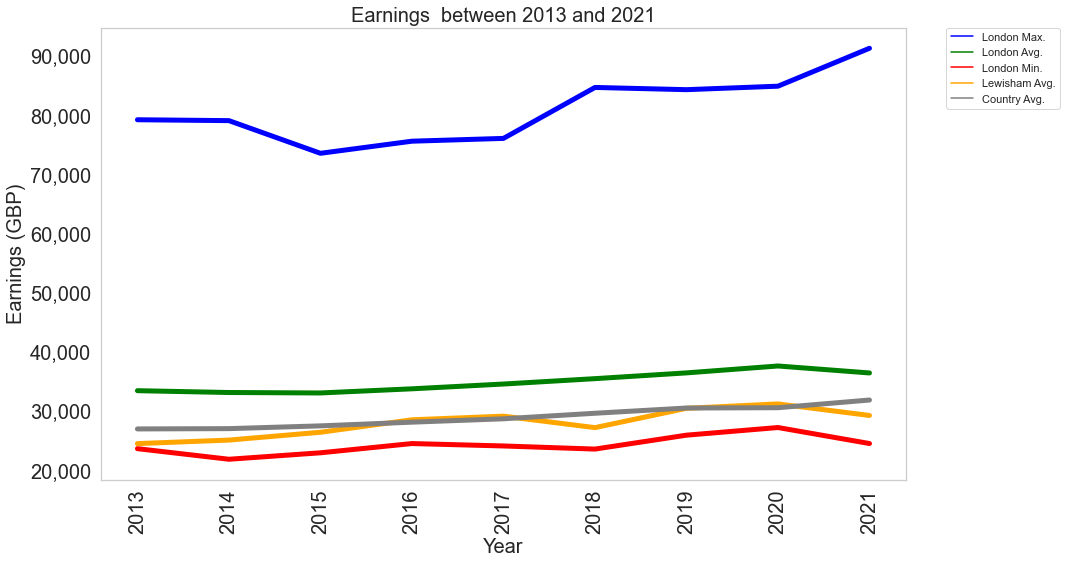

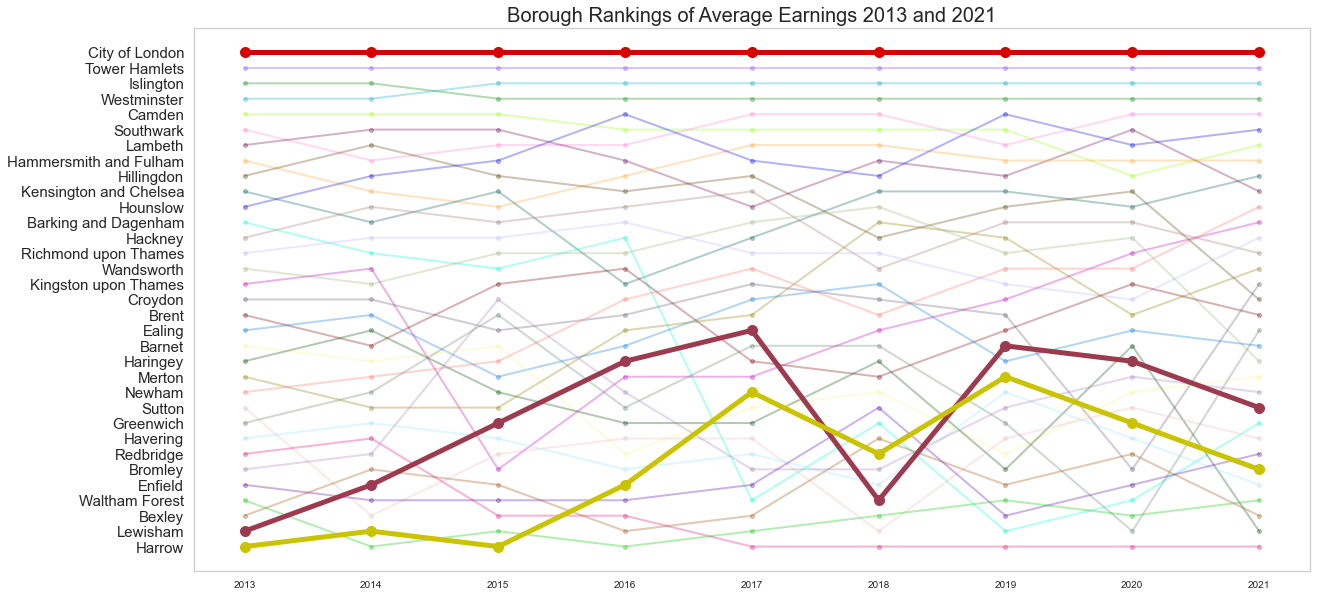

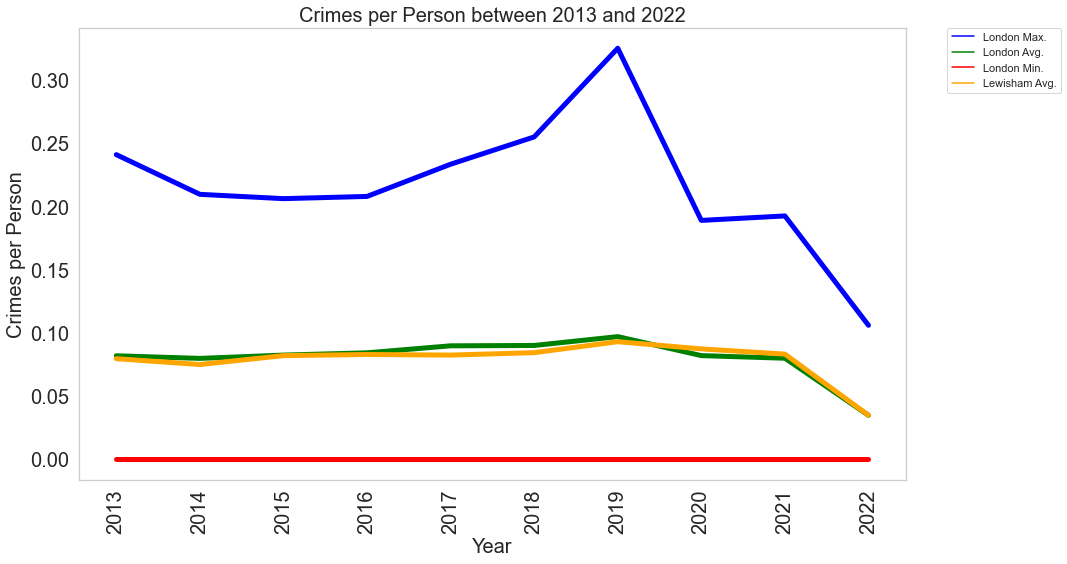

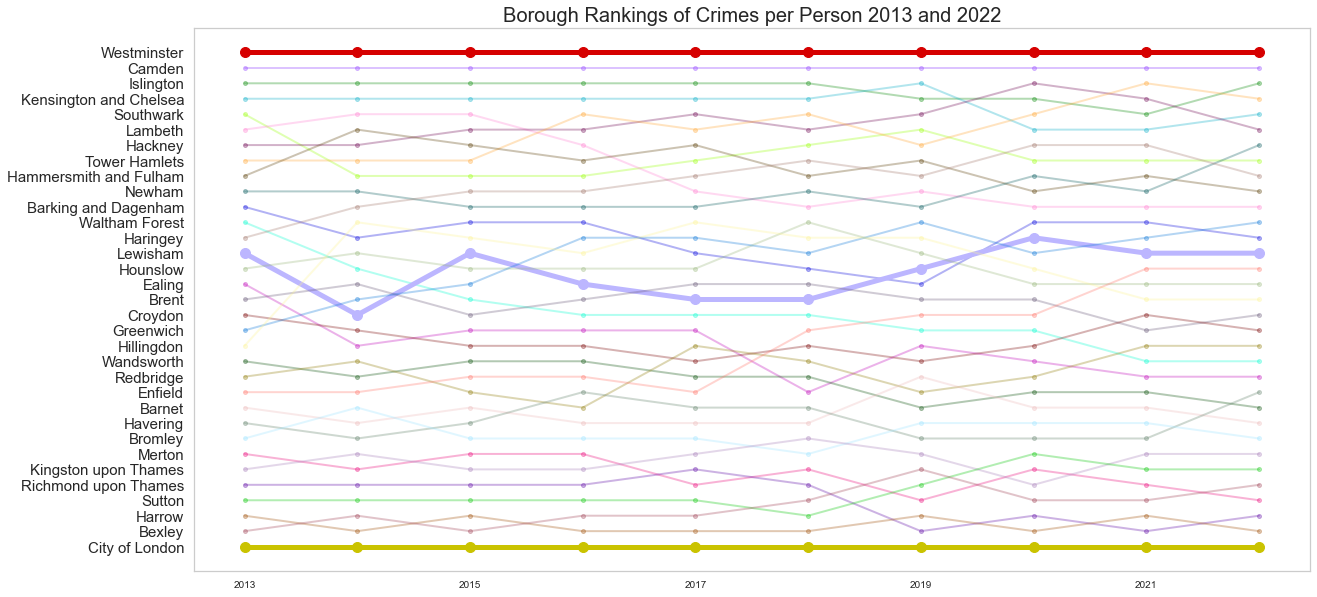

In [4]:
from managers import sd_report_type_general_new as report_general_man

session_id = "REPORT_TYPE_01_GENERAL"
template_processor_file_name = "./reports/processors/sd_general_report_template_processor_dev.json"
report_option = "Full Report"

## Create the report context
report_context = {}
report_context["template_processor_file_name"] = template_processor_file_name
report_context["report_option"] = report_option
report_context["include_mapZ"] = False

report_general_man.generate_report(session_id
                                 , search_term
                                 , report_context
                                 , properties)
